In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# **1. Load the data**

In [2]:
training = pd.read_csv("/kaggle/input/train-and-test-datasets-reupload/Titanic Train Data.csv")
testing = pd.read_csv("/kaggle/input/train-and-test-datasets-reupload/Titanic Test Data.csv")

# **2. Data cleaning and EDA**

First step is to clean the training data

In [3]:
# the first 6 rows of the data
training.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Explanation of the data:
- PassengerId

- Survival(int): whether a passenger survived(1) or died(0)

- Pclass(int): The ticket class (1=1st, 2=2nd, 3=3rd)

- Sex(string): male or female

- Age(float): the age of the passenger. Age could be fractional if less than 1. If the age is estimated, then the age is in form of xx.5

- Sibsp(int): number of siblings/spouses abroad on Titanic

- Parch(int): number of parents/children abroad on Titanic
- Ticket(string): ticket number 

- Fare(float): the ticket fare of the passenger

- Cabin(string): the cabin that the passenger stayed in

- Embarked(string): where the passenger started the journey from (C = Cherbourg, Q = Queenstown, S = Southampton)



In [4]:
# Number of rows and columns in the dataset
training.shape

(891, 12)

In [5]:
# number of empty values in each columns
training.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
# summary about the numerical data
training.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
# summary for categorical data
training.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


There are some irrelevant features such as PassengerId, Ticket number or Name, will be removed from the data

The training data has 12 features, 891 observations (or 891 people on Titanic). There are 687 missing data in the Cabin feature, although this is an important feature in determining whether a person survived or not on Titanic (some cabins could have higher chance of surviving more than others)  

For Age feature, there are 177 missing values. However, it is possible to fill these missing values in the feature. The group-based median age will be filled in. A person with missing age information will be filled in with the median age of the group that the person belonged to based on Pclass, Sex, Sib and Parch.

For Embarked feature, there are 2 observations missing the values. Thus, 2 observations here will be removed.

In [8]:
# drop some meaningless features
training = training.drop(['PassengerId', 'Ticket', 'Name', 'Cabin'], axis=1)

In [9]:
# drop 2 empty Embarked rows
training = training.dropna(subset=['Embarked'])
training

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [10]:
# create a function to fill in the missing age values the median age based on Pclass and Sex groups.
median_age = training.groupby(['Pclass','Sex'])['Age'].median()
print(median_age)

def fill_missing_age(row):
    # fill in the missing age from the training dataset
    if pd.isnull(row['Age']):
        return median_age.loc[row['Pclass'], row['Sex']]
    return row['Age']

training['Age']=training.apply(fill_missing_age, axis=1)
# we do not use SibSp or Parch because they are not strong predictors related to age, such as passengers with same number of SibSp can vary in age. Additionally, there are too many 0 in these values, so making the group of data becomes unreliable

Pclass  Sex   
1       female    35.0
        male      40.0
2       female    28.0
        male      30.0
3       female    21.5
        male      25.0
Name: Age, dtype: float64


In [11]:
#convert sex to integer and merge it to the main training set
training_encoded=pd.get_dummies(training['Sex'], dtype=int)
frames=[training, training_encoded]
training=pd.concat(frames, axis=1)

In [12]:
#convert embarked to integer and merge it to the main training set
embarked_encoded=pd.get_dummies(training['Embarked'], dtype=int)
frames=[training, embarked_encoded]
training=pd.concat(frames, axis=1)

In [13]:
# drop 2 features after encoded
training=training.drop(["Sex", "Embarked"], axis=1)

In [14]:
X=training.iloc[:,1:]
y=training[['Survived']]

After cleaning the data, we will split the data into training and validation sets

In [15]:
# split the data into training and validation sets
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X,y, test_size=0.2)

# **2. "Cleaning" the testing data**

In [16]:
testing.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [17]:
# check if we have any missing values
testing.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

For testing data, as we need 418 observations to check the result, we will need to fill in one missing Fare values using Pclass

In [18]:
# create a function to fill in the fare based on Pclass
median_fare = training.groupby(['Pclass'])['Fare'].median()

def fill_missing_fare(row):
    # fill in the missing age from the training dataset
    if pd.isnull(row['Fare']):
        return median_fare.loc[row['Pclass']]
    return row['Fare']


In [19]:
# build a function to clean the testing dataset
def clean_data(file):
    # drop unnescessary column
    testing1=file.drop(['Ticket', 'Name', 'Cabin'], axis=1)
    # fill in missing ages
    testing1['Age']=testing1.apply(fill_missing_age, axis=1)
    # fill in missing fare
    testing1['Fare']=testing.apply(fill_missing_fare, axis=1)
    #convert sex to integer and merge it to the main training set
    sex_encoded=pd.get_dummies(testing1['Sex'], dtype=int)
    frames=[testing1, sex_encoded]
    testing1=pd.concat(frames, axis=1)
    #convert embarked to integer and merge it to the main training set
    embarked_encoded=pd.get_dummies(testing1['Embarked'], dtype=int)
    frames=[testing1, embarked_encoded]
    testing1=pd.concat(frames, axis=1)
    # drop 2 columns after encoded
    testing1=testing1.drop(['Sex', 'Embarked'], axis=1)
    return testing1
    

In [20]:
test=clean_data(testing)

In [21]:
X_test=test.iloc[:,1:]
passengerId=test.iloc[:,0]

# **3. Build the classification model on standard Support Vector Machine**

We will first try with support vector machine SVC to see how the model perform classification. We will use the standard initialisation from SVC

In [22]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, confusion_matrix

In [23]:
#create the pipeline
svc_pipeline = make_pipeline(StandardScaler(), SVC())

In [24]:
svc_pipeline.fit(X_train, y_train.values.reshape(-1))

Pipeline(steps=[('standardscaler', StandardScaler()), ('svc', SVC())])

In [25]:
y_pred=svc_pipeline.predict(X_val)

In [26]:
accuracy_score(y_val, y_pred)

0.8258426966292135

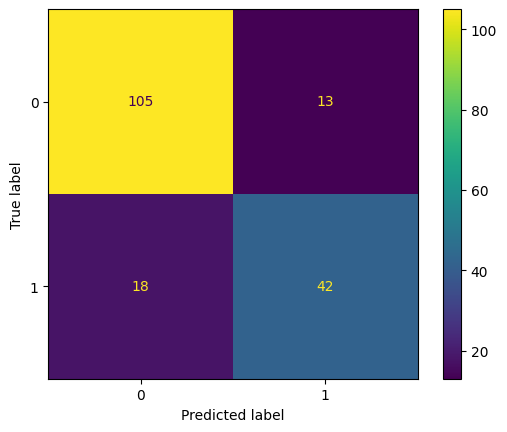

In [27]:
ConfusionMatrixDisplay(confusion_matrix(y_val, y_pred)).plot()

In [28]:
# export the result to CSV
result=pd.concat([passengerId,pd.DataFrame(svc_pipeline.predict(X_test))], axis=1)
result=result.rename(columns={0:'Survived'})
result.to_csv('Prediction1.csv', index=False)

# **4.Cross-Validation for Support Vector Machince**

In this part, we will perform parameter-tuning and cross-validation on the current SVM to boost the model performance

In [29]:
# import some important library
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold # to stratify the split of the data when doing cross validation

In [30]:
# create a function to train the model
def svc_grid_search(pipeline, hyperparameters):
    # create a grid search model
    model=GridSearchCV(pipeline, param_grid=hyperparameters, cv=StratifiedKFold(n_splits=10, shuffle=True, random_state=42), scoring='f1')
    model.fit(X_train, y_train.values.reshape(-1))
    # show the best combination of hyperparameters
    print("Best hyperparameter values: {}\n".format(model.best_params_))
    # show the train accuracy
    train_accuracy=accuracy_score(y_val, model.predict(X_val))
    print(f'Validation accuracy: {train_accuracy:.3f}')
    # show the confusion matrix
    ConfusionMatrixDisplay.from_estimator(
        model,
        X_val,
        y_val,
        display_labels=model.classes_,
    )
    plt.title('Test set result of SVC model with best hyperparameters combination')
    y_pred=model.predict(X_test)
    return model, y_pred

In this part, I will twerk C, gamma and the kernel. For kernel, the default kernel is 'rbf'. I have tried with linear kernel and the accuracy decreased, therefore, we will keep kernel as rbf.

In [31]:
# list of hyperparameters, we will use the pipeline above
hyperparams={'svc__C':np.arange(0.01,10).tolist(), 'svc__gamma':np.arange(0.01,10).tolist()}

Best hyperparameter values: {'svc__C': 2.01, 'svc__gamma': 1.01}

Validation accuracy: 0.826


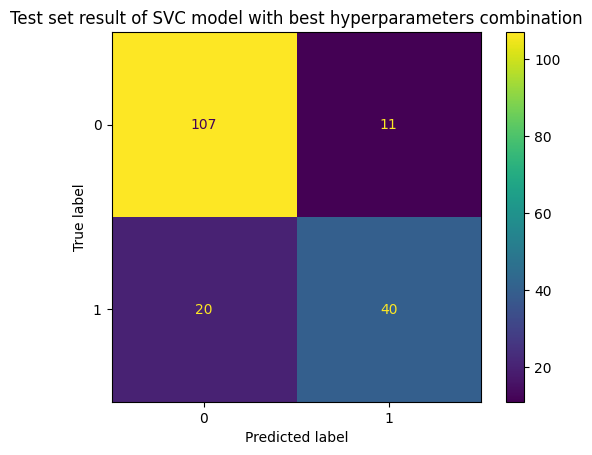

In [32]:
result, y_pred=svc_grid_search(svc_pipeline, hyperparams)

In [33]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,

After using cross-validation, the model performance increased by around 0.03, the number of misclassified observations reduced  a lot, esspecially with number of FN. The best model has C value of 8.01 and gamma of 1.01. It is surprised that the model performance is actually worse compared to the original parameters of SVC

In [34]:
# export the result to CSV
result=pd.concat([passengerId, pd.DataFrame(y_pred)], axis=1)
result=result.rename(columns={0:'Survived'})
result.to_csv('Prediction2.csv', index=False)

# **6.Voting Classifier**

In this stage, we can use voting classifier as one of the ensemble method to perform classification. In this voting classifer, we will use logistic regression, support vector machine and random forest classification. We will also use soft-voting that the model will make the decision based on which class has higher probability in each classification model

In [35]:
# import voting classifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [36]:
# create a voting classifier
voting_clf = VotingClassifier(estimators=[
    ('lr', LogisticRegression()),
    ('rfc', RandomForestClassifier()),
    ('svc', SVC(probability=True))
])
voting_clf.voting='soft'

In [37]:
# create a voting classifier pipeline
voting_clf_pipeline=make_pipeline(StandardScaler(), voting_clf)

In [38]:
voting_clf_pipeline.fit(X_train, y_train.values.reshape(-1))

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('votingclassifier',
                 VotingClassifier(estimators=[('lr', LogisticRegression()),
                                              ('rfc', RandomForestClassifier()),
                                              ('svc', SVC(probability=True))],
                                  voting='soft'))])

In [39]:
y_pred=voting_clf_pipeline.predict(X_val)

In [40]:
accuracy_score(y_val, y_pred)

0.8089887640449438

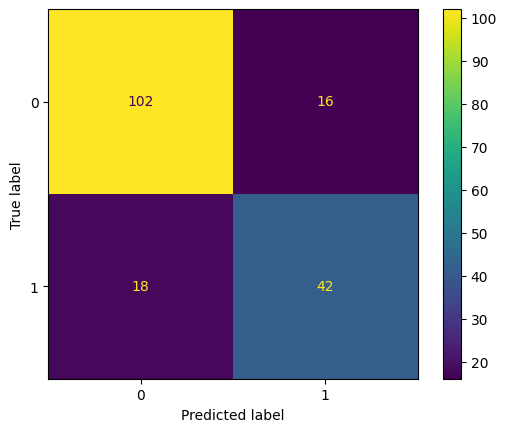

In [41]:
ConfusionMatrixDisplay(confusion_matrix(y_val, y_pred)).plot()

In [42]:
# export the result to CSV
result=pd.concat([passengerId,pd.DataFrame(voting_clf_pipeline.predict(X_test))], axis=1)
result=result.rename(columns={0:'Survived'})
result.to_csv('Prediction3.csv', index=False)